* KNN既可以用来做分类，也可以用来做回归。  
做分类时，用最近邻的K个实例的类的多数作为预测分类；  
做回归时，用最近邻的K个实例的值的平均作为预测回归值

* KNN没有显示的训练过程，而是直接预测。

## KNN算法的重点是如何快速的找出最近邻的K个实例
最简单暴力的方法是：线性扫描。但是样本量很大时，时间消耗很大。  

### kd-tree
https://blog.csdn.net/baimafujinji/article/details/52928203
常用的解决方法是kd-tree，它可以大幅提高K近邻搜索的效率。

k-d-tree（即k-dimensional tree）是一棵形如二叉树的一种非常重要的空间划分数据结构，尤其在多维数据访问中有重要应用。  
注：**quad-tree使用均值作为分割点；kd-tree使用中位数作为分割点。**

### kd-tree应用

* Range search  
区域（或范围）搜索的主要目的在于找出所有位于给定axis-aligned rectangle中的点。  
DBSCAN中会用到  
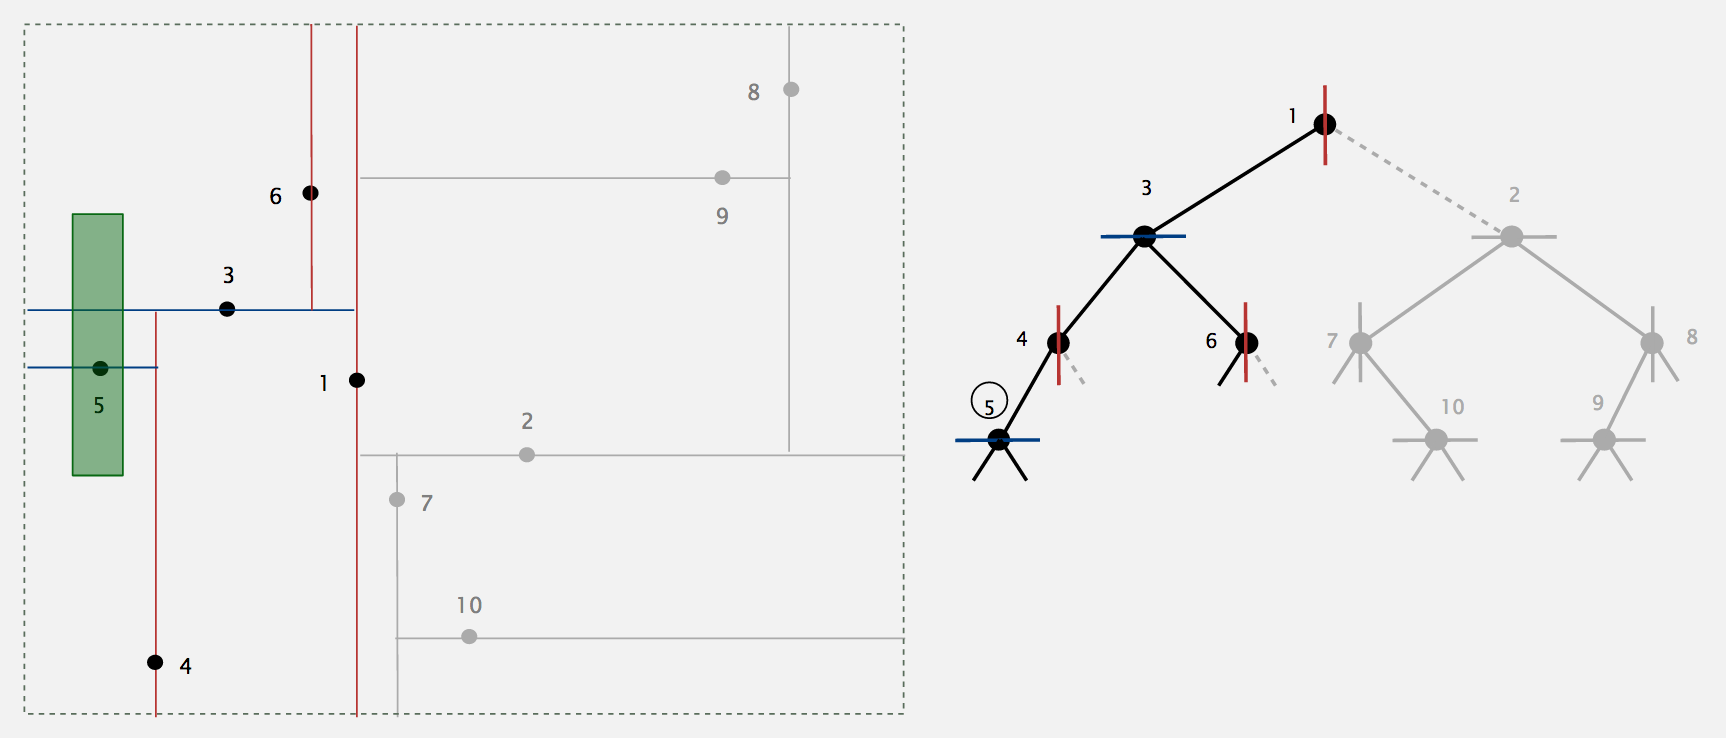

* Nearest neighbour search

### kNN算法在分类时的主要不足
当**样本不平衡**时，如一个类的样本
容量很大，而其他类样本容量很小时，有可能导致当输入一个新样本时
，该样本的K个邻居中大容量类的样本占多数。**因此可以采用权值的方
法（和该样本距离小的邻居权值大）来改进。**

## KNN三要素

* K值选择  
当K值较小，相当于用较小的邻域内的实例进行预测。学习的近似误差会减小，只有与输入实例较为接近（相似的）训练实例才会对预测结果起作用。
但缺点是“学习”的估计误差会增大。预测结果会对近邻的实例点非常敏感。如果临近的实例点恰巧是噪声，预测就会出现错误。
换言之，k值的减小意味着整体模型变得复杂，容易发成**过拟合**。  
如果选择较大的k值，就相当于用较大的邻域中的训练实例进行预测，其优点是可以减少学习的估
计误差，但缺点是学习的近似误差会增大。这时与输入实例较远的（不相似的）训练实例也会对预
测起作用，使预测发生错误。k值的增大就意味着整体的模型变得简单。  
**在应用中，k值一般推荐取一个相对比较小的数值**。并可以通过交叉验证法来帮助选取最优k值。


* 距离度量  
两个实例的距离是两个实例相似度的反应。一般距离的计算方式为欧式距离。
在计算距离是要做**归一化处理**。

* 决策规则  
有两种：1、多数表决；2、基于距离远近进行加权投票。

## KNN实战
https://blog.csdn.net/baimafujinji/article/details/77914555

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import neighbors
from sklearn import datasets

In [2]:
iris = datasets.load_iris()
X = iris.data[:, 2:4] ##表示我们只取特征空间中的后两个维度
y = iris.target

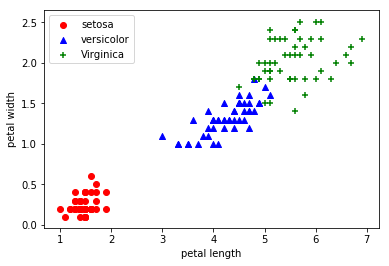

In [3]:
color = ("red", "blue", "green")
plt.scatter(X[:50, 0], X[:50, 1], c = color[0], marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], c = color[1], marker='^', label='versicolor')
plt.scatter(X[100:, 0], X[100:, 1], c = color[2], marker='+', label='Virginica') 
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc=2)
plt.show()

### 利用scikit-learn进行基于kNN的分类

In [4]:
clf = neighbors.KNeighborsClassifier(n_neighbors = 5,
                     algorithm = 'kd_tree', weights='uniform')

In [5]:
clf.fit(X, y)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

然后利用已经建立的模型，预测一下两个新的数据点应该被分到哪一类中。

In [6]:
new_data = [[4.8, 1.6], [2, 0.6]]
result = clf.predict(new_data)
result

array([1, 0])

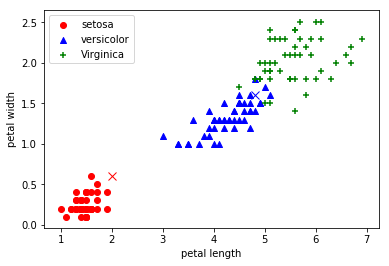

In [8]:
color = ("red", "blue", "green")
plt.plot(new_data[0][0], new_data[0][1], c = color[result[0]], marker='x', ms= 8)
plt.plot(new_data[1][0], new_data[1][1], c = color[result[1]], marker='x', ms= 8)
plt.scatter(X[:50, 0], X[:50, 1], c = color[0], marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], c = color[1], marker='^', label='versicolor')
plt.scatter(X[100:, 0], X[100:, 1], c = color[2], marker='+', label='Virginica') 
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc=2)
plt.show()